## Welcome to the Manual_Analysis notebook

Goals of this notebook:
* Use Pandas and MatplotLib (with a little bit of Seaborn) to analyze and visualize the 2015-2016 Audit Data collected by the Auditor Office of India.

###### The Auditor Office of India, officially known as the Comptroller and Auditor General of India (CAG), is a Central Government Agency established by the Indian Constitution with the express purpose of ensuring public funds are being used properly (making sure the gov't isn't being scammed). It does this by auditing Central and State Government accounts.

## Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Load the Dataset

The dataset is the ['Audit Data' dataset](https://archive.ics.uci.edu/dataset/475/audit+data) from the UCI Machine Learning Repository

In [2]:
ad = pd.read_csv('../audit_data/audit_risk.csv') # 'ad' for 'audit data'
td = pd.read_csv('../audit_data/trial.csv') # 'td' for 'trial data'

## Investigate and Understand the dataset

Trying to understand the nature and structure of the dataset, as this was only roughly explained on the UCI website
- what are the specific columns, what do they mean, and how do they go together?

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk', 'Risk'],
      dtype='object')
Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'SCORE_A', 'PARA_B', 'SCORE_B',
       'TOTAL', 'numbers', 'Marks', 'Money_Value', 'MONEY_Marks', 'District',
       'Loss', 'LOSS_SCORE', 'History', 'History_score', 'Score', 'Risk'],
      dtype='object')


<Axes: >

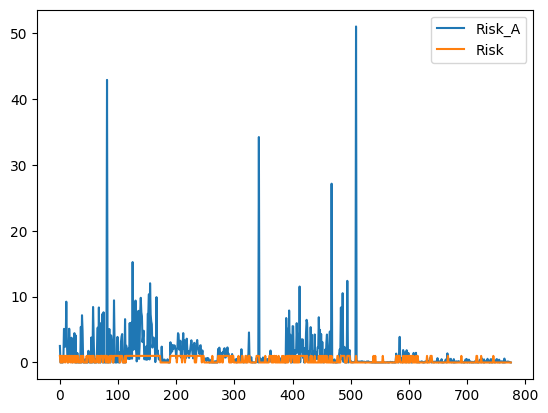

In [23]:
#print(ad.shape)
#print(td.shape) #observation: td 18 columns, ad has 27. Both have 776 rows, instead of 777

print(ad.columns) # to see the different columns that ad and td have
print(td.columns)

#ad.describe().loc[['min', 'max']]
#ad.info() # to see the object types for the columns for ad and td

#ad.Sector_score.unique()
#ad = ad[['District_Loss']] # this line used to see columns automatically hidden by Jupyter (since there's a high number of columns)
#print(ad.sample(5))
#print(td.sample(5))
#td.District.unique()

#ad.sample(10)

# comparing Risk to other columns to look for correlations
ad_to_plot = ad[['Risk_A', 'Risk']]
ad_to_plot.plot()

#ad.loc[ad.LOCATION_ID.isin(['LOHARU', 'NUH', 'SAFIDON'])]

#ad.Risk.unique() # Risk is a binary value (this is the target feature! ding ding ding ding ding! 🔔🔔🔔)

## Conclusions

Based on some investigation using Pandas methods, I have learned the following:
- 'LOCATION_ID' is a unique location identifier, (pretty self explanatory)
- 'Sector_score' is a score assigned to the sector (type of firm), likely a numerical representation of the risk that a firm in that sector is a suspicious firm
- The 'para's, like 'PARA_A', 'PARA_B', etc. are risk factors (features) identified by experts
- The 'score's that follow each 'para' are likely a numerical representation of risk assigned to each firm based on that specifc 'para'
- The 'risk's that follow each 'para' and 'score' column are likely the 'score' turned into a percentage form.
- The 'TOTAL' column appears to be the sum of the 'risk' columns from the previous 'para's
- 'Audit_Risk' appears to be a final calculated % chance that the firm is suspicious (this column only appears in ad)
- 'Risk' is a binary value classifying a firm as suspicious or not. '1' likely means suspicious, and '0' likely means not suspicious.

We can guess about these columns, but with less surety:
- money_value: perhaps this is the scale of the firm
- columns containing 'history' in the name: perhaps these are about credit or fraud incidents in the past involving this firm
- columns containing 'history' in the name: perhaps these are 

Note: information about 'para's, 'risk', and 'score' is based on the paragraph provided on the UCI page + some hypothetical reasoning

Note: 'Audit para's, or 'Audit paragraphs', are irregularities, discrepancies, or areas of concern identified by auditors in their reports. I know from my investment banking analysis class from my Finance major that there are often red flags that appear on a firm's financial statements some time(usually about 1-2 years) before the collapse of a firm (default). These red flags are noticable to trained professionals, such as auditors, and 'Audit Paragraph's are where these things would be mentioned. They may or may not be causes of concern, but I suspect there will be a strong correlation between higher Para scores and suspicious firms.